<a href="https://colab.research.google.com/github/Kenzo-Sugai/MLP-PCA-iris/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mantida 97.77% da informação do conjunto inicial de dados
PCA


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP


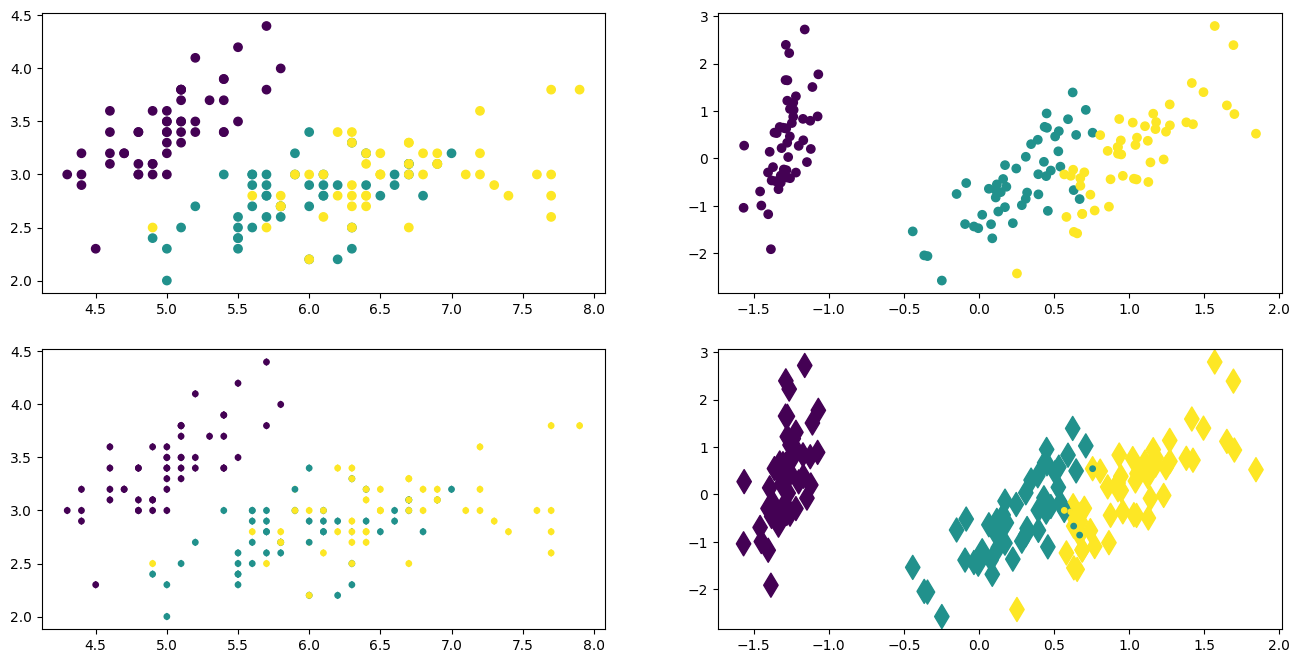

MLP
PCA


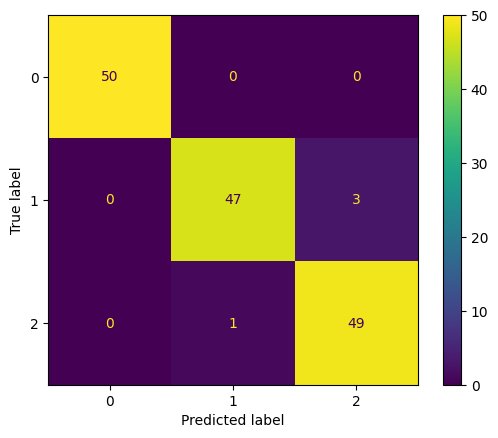

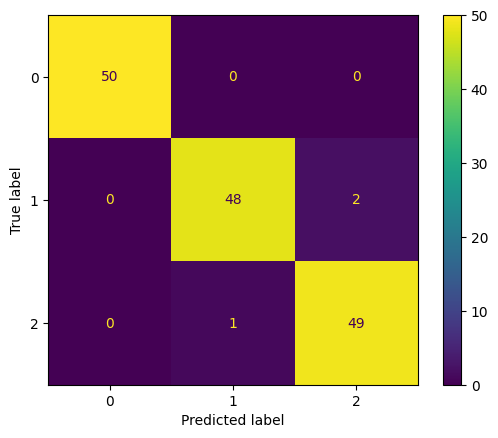

In [75]:
#Alunos
# Kenzo Sugai 22.121.005-7
# Guilherme Vieira 22.121.025-5

from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = load_iris()

features =data.data
target = data.target


plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(features[:,0], features[:,1], c=target,marker='o',cmap='viridis')



Classificador = MLPClassifier(hidden_layer_sizes = (10), alpha=1, max_iter=1000)
Classificador.fit(features,target)
predicaompl = Classificador.predict(features)

plt.subplot(2,2,3)
plt.scatter(features[:,0], features[:,1], c=predicaompl,marker='d',cmap='viridis',s=10)
plt.scatter(features[:,0], features[:,1], c=target,marker='o',cmap='viridis',s=15)



pca = PCA(n_components=2, whiten=True, svd_solver='randomized')
pca = pca.fit(features)
pca_features = pca.transform(features)
print('Mantida %5.2f%% da informação do conjunto inicial de dados'%(sum(pca.explained_variance_ratio_)*100))

print("PCA")

plt.subplot(2,2,2)
plt.scatter(pca_features[:,0], pca_features[:,1], c=target,marker='o',cmap='viridis')


ClassificadorPCA = MLPClassifier(hidden_layer_sizes = (10), alpha=1, max_iter=1000)
ClassificadorPCA.fit(pca_features,target)


predicao = ClassificadorPCA.predict(pca_features)

print("MLP")
plt.subplot(2,2,4)
plt.scatter(pca_features[:,0], pca_features[:,1], c=predicao,marker='d',cmap='viridis',s=150)
plt.scatter(pca_features[:,0], pca_features[:,1], c=target,marker='o',cmap='viridis',s=15)
plt.show()

print("MLP")


cm = confusion_matrix(target, predicao, labels=Classificador.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Classificador.classes_)
disp.plot()

print("PCA")


cm = confusion_matrix(target, predicaompl, labels=ClassificadorPCA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ClassificadorPCA.classes_)
disp.plot()


# ConfusionMatrixDisplay(Classificador, features, target,include_values=True,display_labels=data.target_names)
# plt.show()

# ConfusionMatrixDisplay(ClassificadorPCA, pca_features, target,include_values=True,display_labels=data.target_names)
# plt.show()